Stats Homework Week 4

-----------------------

Pre-Lecture Homework 

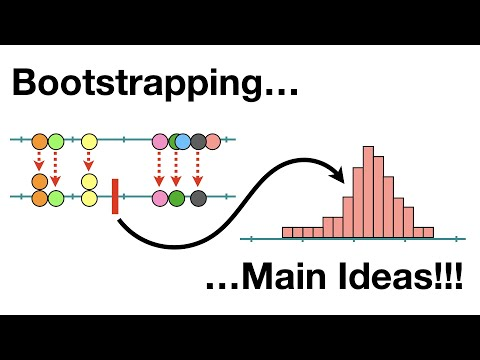

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

1. 
Standard deviation measures how close sample values are to the mean. It shows how accurately the mean represents the sample data. while standard error of the mean measures how the different the sample mean is from the true mean. 
captures the precision of the sample mean as an estimate of the true mean.

2.

To find the 95% confindence interval. You must find the margin of error by multiply the SEM by the z-score for 95% confidence (1.96). Then by subtracting the MOE from the mean you find the minimum value of the interval and then adding the MOE to the mean to find the maximum.
if you were to repeatedly take random samples from the population and compute the sample means, 95% of the time, the sample mean will fall within this interval.

In [2]:
#4.
import numpy as np

# Function to compute a bootstrap confidence interval for a specified statistic
def bootstrap_confidence_interval(data, num_bootstrap_samples, alpha, stat_func=np.mean):
    """
    Generate a bootstrap confidence interval for a given statistic.

    Parameters:
    data (array-like): The sample data from the population.
    num_bootstrap_samples (int): The number of bootstrap samples to generate.
    alpha (float): The significance level for the confidence interval (e.g., 0.05 for 95% CI).
    stat_func (function): The statistic function (default is np.mean, can be np.median, etc.).

    Returns:
    tuple: Lower and upper bounds of the confidence interval.
    """
    # Generate bootstrap samples and compute the statistic for each sample
    bootstrap_samples = np.random.choice(data, size=(num_bootstrap_samples, len(data)), replace=True)
    bootstrap_statistics = np.apply_along_axis(stat_func, 1, bootstrap_samples)

    # Compute the lower and upper percentiles (e.g., for 95% CI, use 2.5th and 97.5th percentiles)
    lower_bound = np.percentile(bootstrap_statistics, 100 * (alpha / 2))
    upper_bound = np.percentile(bootstrap_statistics, 100 * (1 - alpha / 2))

    return lower_bound, upper_bound

# Example usage:
np.random.seed(42)  # For reproducibility

# Sample data (you can replace this with your actual sample)
data = np.random.normal(loc=50, scale=10, size=100)

# Parameters for the bootstrap
num_bootstrap_samples = 1000  # Number of bootstrap resamples
alpha = 0.05  # Significance level for a 95% confidence interval

# Compute the 95% bootstrap confidence interval for the mean
ci_mean = bootstrap_confidence_interval(data, num_bootstrap_samples, alpha, stat_func=np.mean)
print(f"95% Bootstrap Confidence Interval for the Mean: {ci_mean}")

# To change this to compute a 95% CI for a different statistic, like the median,
# simply replace the `np.mean` with `np.median` in the function call:

# Compute the 95% bootstrap confidence interval for the median
ci_median = bootstrap_confidence_interval(data, num_bootstrap_samples, alpha, stat_func=np.median)
print(f"95% Bootstrap Confidence Interval for the Median: {ci_median}")



95% Bootstrap Confidence Interval for the Mean: (47.276635751407504, 50.62851486440195)
95% Bootstrap Confidence Interval for the Median: (46.98896304410711, 51.10922589709866)


Chatbot Summary:

1. Difference between Standard Error of the Mean (SEM) and Standard Deviation (SD):
- Standard Deviation (SD) measures the spread of individual data points in a dataset, reflecting the overall variability of the dataset.
- Standard Error of the Mean (SEM) measures the precision of the sample mean as an estimate of the population mean. It is derived from the standard deviation and the sample size
- Key Difference: SD captures the variability of the data, while SEM captures the variability of the sample mean as an estimate of the population mean.
2. Using SEM to Create a 95% Confidence Interval for the Population Mean:
- Steps to create a 95% confidence interval (CI):
    1. Calculate the SEM: SEM = SD/n
    2. Use a z-score of 1.96 for 95% confidence.
    3. Compute the margin of error: MOE=1.96xSEM
    4. Construct the CI: CI = (x - MOE, x + MOE)
- This CI provides a range where 95% of the sample means from bootstrapped samples would fall, representing a 95% likelihood of covering the true population mean.
3. Code for a 95% Bootstrap Confidence Interval for the Population Mean:
- A Python code was provided that uses bootstrapping to generate a 95% confidence interval for the mean of a sample. The code can be easily modified to compute confidence intervals for other statistics, such as the median, by changing the statistic function (from np.mean to np.median or other functions like np.var for variance).
- Example usage and comments were provided to demonstrate how the code can be adapted for different population parameters.



Chatbot Link:https://chatgpt.com/share/66ff43db-e788-8006-af2a-1a179529e773 

-----------------

Post Lecture Homework

5. We distinguish between the role of the population parameter and the sample statistic when it comes to confidence intervals because the population parameter is unknown and the sample statistic is used to estimate it. The confidence interval reflects how well the sample statistic estimates the population parameter.

6. 
   1. What is the process of bootstrapping?
        1. Making a bootstrapped dataset by starting with the original dataset of size n. Creating a new number line, and randomly draw values from the original dataset until you have n number of values.
        2. Calculating the mean from the bootstrapped dataset (or other statistics like median)
        3. Tracking the calculations
        4. Repeating mutiple times 
        
   2.
The primary purpose of bootstrapping is to use resampling from the data at hand to make reliable statistical inferences (such as calculating confidence intervals or estimating standard errors) without requiring strong assumptions about the underlying population distribution.


3.
By creating many bootstap samples and tracking the calcuation of the mean you can then calculate a 95% confidence interval and check if you guess is in the interval. If it is in the interval your guess is plausible 
   

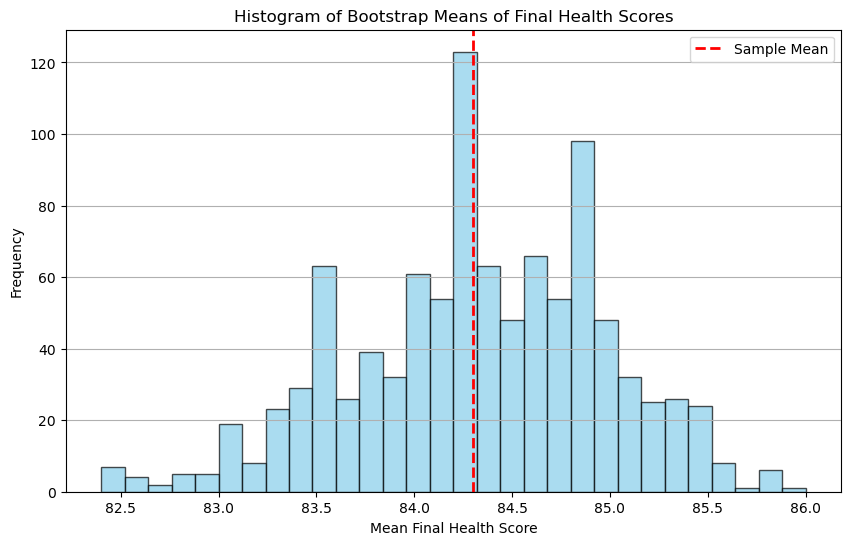

In [3]:
#8.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a DataFrame with the provided data
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)

# Extract Final Health Scores
final_health_scores = df['FinalHealthScore']

# Set the random seed for reproducibility
np.random.seed(42)

# Bootstrapping
n_iterations = 1000
bootstrap_means = []

for _ in range(n_iterations):
    bootstrap_sample = np.random.choice(final_health_scores, size=len(final_health_scores), replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))

# Plot histogram of bootstrap means
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_means, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Bootstrap Means of Final Health Scores')
plt.xlabel('Mean Final Health Score')
plt.ylabel('Frequency')
plt.axvline(np.mean(final_health_scores), color='red', linestyle='dashed', linewidth=2, label='Sample Mean')
plt.legend()
plt.grid(axis='y')
plt.show()


Purpose of Bootstrapping in this context 
Since you only have a sample of 10 patients, you don’t know how much variability exists in the population's true Final Health Score. Bootstrapping helps estimate this by generating multiple resamples from the data, allowing you to observe how the mean changes from one sample to another.
This gives insight into how stable or variable the sample mean is, helping assess whether it’s a good estimate of the population mean.

Null Hypothesis 
the null hypothesis is the assumption that the vaccine has no effect on the health scores of patients and that the changes in health scores are due to random chance, and not because of the vaccine.
If the hypothesized mean (85) falls within the confidence interval, you fail to reject the Null Hypothesis, suggesting that the sample data is consistent with the population mean being 85.
If the hypothesized mean falls outside the confidence interval, you may reject the Null Hypothesis, indicating that the true population mean is likely different from 85.



ChatBot Summary:

Topic: Bootstrapping and Hypothesis Testing Using Patient Health Data
Understanding Confidence Intervals and Bootstrapping:

You asked about distinguishing between population parameters and sample statistics in the context of confidence intervals. I explained that population parameters are fixed, but unknown, values for the entire population, while sample statistics are estimates derived from a sample. Confidence intervals use sample statistics to estimate population parameters.
We discussed bootstrapping, a resampling technique used to estimate the variability of a sample statistic (like the mean) by generating many resampled datasets. This helps create a distribution of the statistic and build confidence intervals without relying on assumptions about the population distribution.
Purpose of Bootstrapping:

Bootstrapping helps estimate the variability of a sample mean, construct confidence intervals, and evaluate the plausibility of a hypothesized population mean (such as the average Final Health Score).
Hypothesis Testing Using Bootstrapping:

We explored how to test the plausibility of a hypothesized mean using bootstrapping. By generating a bootstrapped confidence interval for the sample mean, you can check whether your hypothesized mean falls within that interval.
The Null Hypothesis (H₀) in this context would be that there is no significant difference between the sample mean and a hypothesized mean, implying any observed difference is due to random chance.
Python Coding:

I provided Python code to perform bootstrapping on your dataset of patient health scores and visualize the distribution of bootstrapped means.
The code involved resampling with replacement from the dataset, calculating the mean for each resample, and plotting a histogram of the bootstrap means with the sample mean as a reference line.
The code was later modified to ensure reproducibility by setting a random seed using np.random.seed().
Visualizing Patient Data:

I helped you generate a histogram to visualize the distribution of the patients’ Initial Health Scores, with the sample mean indicated by a dashed line. This allows for comparison between the initial and final health scores for patients.


Chatbot Link: https://chatgpt.com/share/66ff64fb-e0b0-8006-b02b-f437c1319d90